In [2]:
%load_ext autoreload
%autoreload 2

In [7]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter as pc
import itertools
import pandas as pd

from utilities_hw2 import plot_results

# OneMax

In [11]:
iters = 5 # number of iterations for each setting in grid search

results = {}    

fitness_fn = mlrose.OneMax()
param_grid_problem = {'fitness_fn': fitness_fn,
                      'max_val': 2,
                      'length': list(range(5, 51, 15)), 
                     }
problem = mlrose.DiscreteOpt

algorithms = {
    'MIMIC': {
        'algorithm': mlrose.mimic,
        'param_grid_algorithm': {'return_statistics': True, 'pop_size': ['problem_length'], 'keep_pct': [0.2], 'max_attempts': [25], 'max_iters': 1000},
    },
    'Hill Climbing': {
        'algorithm': mlrose.hill_climb,
        'param_grid_algorithm': {'return_statistics': True, 'restarts': 5},
    },
#     'Hill Climbing (sample)': {
#         'algorithm': mlrose.random_hill_climb,
#         'param_grid_algorithm': {'return_statistics': True, 'restarts': 5, 'max_attempts': 20},
#     },
    'Simulated Annealing': {
        'algorithm': mlrose.simulated_annealing,
        'param_grid_algorithm': {'return_statistics': True, 'max_attempts': 100},
    },
    'Genetic Algorithm': {
        'algorithm': mlrose.genetic_alg,
        'param_grid_algorithm': {'return_statistics': True, 'pop_size': ['5*problem_length'], 'mutation_prob': 0.1, 'max_attempts': 10},
    },
}

for k, d in algorithms.items():
    d['problem'] = problem
    d['param_grid_problem'] = param_grid_problem

    
for algo_name, settings in algorithms.items():
    print(f"Looping for {algo_name}")
    gs = mlrose.GridSearch(algorithm=settings['algorithm'], param_grid_algorithm=settings['param_grid_algorithm'], 
                           problem=settings['problem'], param_grid_problem=settings['param_grid_problem'], iters=iters)
    gs.evaluate()
    results[algo_name] = gs.results

Looping for MIMIC
Running case 1/4: iteration 0
MIMIC finished after using 25/25 attempts, 26/1000, iters
Running case 1/4: iteration 1
MIMIC finished after using 25/25 attempts, 25/1000, iters
Running case 1/4: iteration 2
MIMIC finished after using 25/25 attempts, 26/1000, iters
Running case 1/4: iteration 3
MIMIC finished after using 25/25 attempts, 26/1000, iters
Running case 1/4: iteration 4
MIMIC finished after using 25/25 attempts, 26/1000, iters
Running case 2/4: iteration 0
MIMIC finished after using 25/25 attempts, 27/1000, iters
Running case 2/4: iteration 1
MIMIC finished after using 25/25 attempts, 43/1000, iters
Running case 2/4: iteration 2
MIMIC finished after using 25/25 attempts, 40/1000, iters
Running case 2/4: iteration 3
MIMIC finished after using 25/25 attempts, 26/1000, iters
Running case 2/4: iteration 4
MIMIC finished after using 25/25 attempts, 30/1000, iters
Running case 3/4: iteration 0
MIMIC finished after using 25/25 attempts, 27/1000, iters
Running case 3

In [5]:
results_df = {k: pd.DataFrame(r) for k, r in results.items()}
# for k, df in results_df.items():
#     print(df)


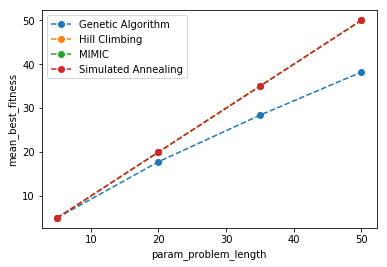

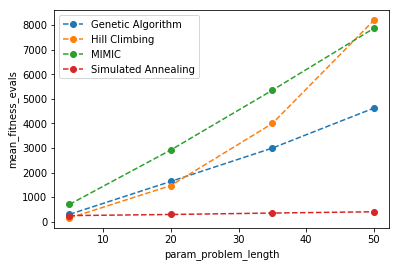

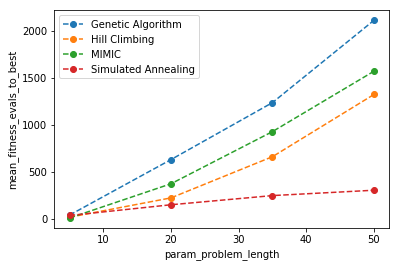

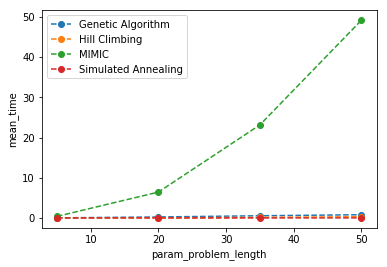

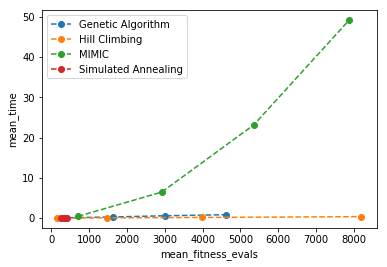

In [10]:
plot_results(results_df)